In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [27]:
import os
num=[]
Z = []
path = '/Users/liuyingjie/Downloads/data/DBSCAN/'
filenames = os.listdir(path)
indexs = []
for filename in filenames:
    if filename.startswith("."):
        continue
    indexs.append(int(filename))
indexs.sort()
#print(indexs)
for index in indexs:
    file_path = path + str(index)
    with open(file_path,'r',encoding='utf8') as f:
        lines=f.readlines()
    for i in range(99, 119):
        temps = lines[i].split()
        point=[]
        point.append(int(temps[2]))
        point.append(int(temps[3]))
        num.append(point)
    for line in lines:
        temps = line.split()
        size = len(temps)
        if(size == 11 and temps[0]=='10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
        if(size == 16 and temps[0] == '10000000'):
            Z.append(int(float(temps[1])*37000000000))
            Z.append(int(float(temps[6])*37000000000))
            Z.append(int(float(temps[11])*37000000000))
            
for i in range(len(Z)):
    num[i].append(Z[i])
#print(num)

In [28]:
x1=[]
x2=[]

def getCircle(p1, p2, p3):
    circle=[]
    x21 = p2[0] - p1[0]
    y21 = p2[1] - p1[1]
    x32 = p3[0] - p2[0]
    y32 = p3[1] - p2[1]
    # three colinear
    if (x21 * y32 - x32 * y21 == 0 or x21==0):
        return None
    xy21 = p2[0] * p2[0] - p1[0] * p1[0] + p2[1]* p2[1]- p1[1] * p1[1]
    xy32 = p3[0] * p3[0] - p2[0] * p2[0] + p3[1] * p3[1] - p2[1] * p2[1]
    y0 = (x32 * xy21 - x21 * xy32) / (2 * (y21 * x32 - y32 * x21))
    x0 = (xy21 - 2 * y0 * y21) / (2.0 * x21)
    circle.append(x0)
    circle.append(y0)
    return circle


num.sort(key=lambda k:k[2],reverse=False)
#print(num)
res=[]
#误差设计
interval=370;
for i in range(len(num)):
    for j in range(i+1,len(num)):
        if num[j][2]-num[i][2]>interval:
            break
        for n in range(j+1,len(num)):
            if num[n][2]-num[i][2]>interval:
                break
            ans=getCircle(num[i],num[j],num[n])
            if ans:
                x1.append(ans[0])
                x2.append(ans[1])
#print(x1,x2)


[100.0, 100.0, 100.02380952380953, 99.95454545454545, 100.0, 100.0, 100.16666666666667, 97.5, 100.0, 100.5, 100.0, 100.0, 100.0, 100.5, 99.88461538461539, 99.73809523809524, 100.5, 101.5, 100.15, 101.0, 100.78571428571428, 100.22, 98.5, 100.0, 101.16666666666666, 100.29166666666667, 100.5, 100.5, 100.0, 101.0, 101.0, 100.0, 98.5, 98.5, 100.0, 100.0, 99.5, 99.5, 103.0, 100.5, 99.72727272727272, 100.0, 101.83333333333333, 101.0, 99.73809523809524, 100.5, 101.5, 100.0, 101.5, 99.60526315789474, 101.5, 99.7, 99.5, 99.5, 100.5, 100.0, 100.0, 100.5, 100.0, 101.0, 100.0, 100.5, 101.0, 100.5, 100.0, 101.5, 100.0, 101.5, 99.5, 99.95454545454545, 100.0, 100.0, 100.5, 98.5, 99.85, 100.05555555555556, 100.01851851851852, 100.0, 100.5, 100.5, 100.5, 100.0, 100.1153846153846, 100.375, 100.0, 99.97368421052632, 99.5, 100.0, 100.0, 100.22, 100.78571428571428, 98.5, 100.5, 99.0, 100.5, 99.5, 100.5, 98.5, 99.0, 99.5, 100.5, 101.0, 100.0, 101.0, 101.5, 100.5, 100.0, 99.875, 102.5, 101.5, 100.0, 100.25, 1

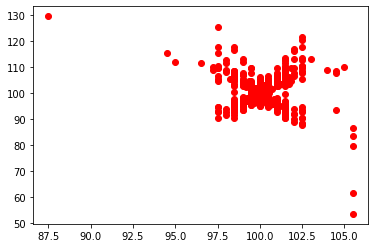

In [4]:
plt.plot(x1,x2,'ro')
plt.show()
x_=np.array(x1)
x_.reshape(-1,1)
y_=np.array(x2)
y_.reshape(-1,1)

xn=np.array([x_,y_])
Xn=np.transpose(xn)
dataLen = len(Xn)
#print(Xn)

In [5]:
from numpy import *
import time
import matplotlib.pyplot as plt


# calculate Euclidean distance 欧几里得度量
def euclDistance(vector1, vector2):
    return sqrt(sum(power(vector2 - vector1, 2)))  # 求这两个矩阵的距离，vector1、2均为矩阵

# init centroids with random samples
# 在样本集中随机选取k个样本点作为初始质心
def initCentroids(dataSet, k):
    numSamples, dim = dataSet.shape  # 矩阵的行数、列数
    centroids = zeros((k, dim))  # 感觉要不要你都可以
    #centroids[0, :]=mean(dataSet, axis=0)
    centroids[0, :] =[median(dataSet[:,0]),median(dataSet[:,1])]
    #print(centroids[0, :])
    i=1
    while i<k :
        index = int(random.uniform(0, numSamples))  # 随机产生一个浮点数，然后将其转化为int型
        if euclDistance(centroids[0, :], dataSet[index, :])<20:
            continue;
        centroids[i, :] = dataSet[index, :]
        i+=1
    #print(centroids)
    return centroids


# k-means cluster
# dataSet为一个矩阵
# k为将dataSet矩阵中的样本分成k个类
def kmeans(dataSet, k):
    max,maxLen=[],0
    numSamples = dataSet.shape[0]  # 读取矩阵dataSet的第一维度的长度,即获得有多少个样本数据
    # first column stores which cluster this sample belongs to,
    # second column stores the error between this sample and its centroid
    clusterAssment = mat(zeros((numSamples, 2)))  # 得到一个N*2的零矩阵
    clusterChanged = True
    #times=0

    ## step 1: init centroids
    centroids = initCentroids(dataSet, k)  # 在样本集中随机选取k个样本点作为初始质心

    while clusterChanged:
        clusterChanged = False
        #times+=1
        ## for each sample
        for i in range(numSamples):  # range
            minDist = 100000.0
            minIndex = 0
            ## for each centroid
            ## step 2: find the centroid who is closest
            # 计算每个样本点与质点之间的距离，将其归内到距离最小的那一簇
            for j in range(k):
                distance = euclDistance(centroids[j, :], dataSet[i, :])
                if distance < minDist:
                    minDist = distance
                    minIndex = j

                    ## step 3: update its cluster
            # k个簇里面与第i个样本距离最小的的标号和距离保存在clusterAssment中
            # 若所有的样本不在变化，则退出while循环
            if clusterAssment[i, 0] != minIndex :
                clusterChanged = True
                clusterAssment[i, :] = minIndex, minDist ** 2  # 两个**表示的是minDist的平方

        ## step 4: update centroids 更新质心
        for j in range(k):
            # clusterAssment[:,0].A==j是找出矩阵clusterAssment中第一列元素中等于j的行的下标，返回的是一个以array的列表，第一个array为等于j的下标
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]]  # 将dataSet矩阵中相对应的样本提取出来

            #centroids[j, :] = mean(pointsInCluster, axis=0)  # 计算标注为j的所有样本的平均值
            centroids[j, :] =[median(pointsInCluster[:,0]),median(pointsInCluster[:,1])] # 计算标注为j的所有样本的中位值
            #代码修改部分
            ##print(pointsInCluster)
            if maxLen<(len(pointsInCluster)):
                maxLen=len(pointsInCluster)
                max=centroids[j, :]
                

    print('Congratulations, cluster complete!')
    #print(pointsInCluster)
    #print(median(pointsInCluster[:,1]))
    #print(times)
    #print(maxLen)
    return max,centroids, clusterAssment


# show your cluster only available with 2-D data
# centroids为k个类别，其中保存着每个类别的质心
# clusterAssment为样本的标记，第一列为此样本的类别号，第二列为到此类别质心的距离
def showCluster(dataSet, k, centroids, clusterAssment):
    numSamples, dim = dataSet.shape
    if dim != 2:
        print("Sorry! I can not draw because the dimension of your data is not 2!")
        return 1

    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Sorry! Your k is too large! please contact wojiushimogui")
        return 1

        # draw all samples
    for i in range(numSamples):
        markIndex = int(clusterAssment[i, 0])  # 为样本指定颜色
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])

    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)

    plt.show()

In [26]:
ans,centroids, clusterAssment =kmeans(Xn,3)
print(ans)
#print(centroids)
#print(clusterAssment)

Congratulations, cluster complete!
[100. 100.]


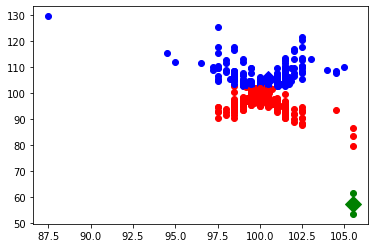

In [7]:
showCluster(Xn,3,centroids, clusterAssment)